# Satellite Image Visualization for L2 products

## NOAA products

In [4]:
#==================== We set product parameters to download ====================
import os, re

# You can create a list of number strings by using: [f"{i:02}" for i in range(13)]
destination_path = '.\\GOESimages\\'
bucket = 'noaa-goes16'
satellite = bucket[re.search('noaa-',bucket).end():]
'''
ABI-L2-DSRF: Downward Shortwave Radiation (1 file per hour)
ABI-L2-ACMF: Clear Sky Mask (6 files per hour)
ABI-L2-TPWF: Total Precipitable Water (6 files per hour)
ABI-L2-RRQPEF: Rainfall rate (6 files per hour)
ABI-L2-LSTF: Land surface temperature (1 files per hour)
'''
product=['ABI-L2-DSRF','ABI-L2-ACMF','ABI-L2-TPWF','ABI-L2-RRQPEF','ABI-L2-LSTF'] # Product to select
channel=['C01','C02','C03'] # Number of band to select from 'C01' to 'C16'
# Select a product and channel to process
selected_product = product[0]
domain = selected_product[-1]
selected_channel = channel[0]
day, month, year = '10', '07', '2023' # Date in dd/mm/yyyy format
hour = '17' # UTC, should be a string number between '00' and '23'

#==================== Building the path to the folder for file storage ====================
FilePath = os.path.join(destination_path,satellite,year, month, day, selected_product,hour)
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP") :
    FilePath = os.path.join(FilePath,channel[0])
print("Processing files in path: {}".format(FilePath))

if os.path.exists(FilePath):
    files = os.listdir(FilePath)
    display(files)
else: print("Directory does not exist.")

Processing files in path: .\GOESimages\goes16\2023\07\10\ABI-L2-DSRF\17


['OR_ABI-L2-DSRF-M6_G16_s20231911700206_e20231911709515_c20231911727338.nc']

In [2]:
from goespy.Downloader import ABI_Downloader
ABI = ABI_Downloader(destination_path,bucket,year,month,day,hour,selected_product,selected_channel)


======================================== goes-py =========================================
 A Python package can be useful to download dataset from goes satellite on AWS  0.2.1v


In [5]:
import ipywidgets as widgets

files = os.listdir(FilePath)
files = [file for file in files if file.endswith('.nc')]
print("GOES images available:")
display(files)

# Create dropdown widget with index values of files list
file_selector = widgets.Dropdown(
    options=list(range(len(files))),
    value=0,
    description='Select file:',
)

# Define function to display selected file
def on_file_select(change):
    global selected_index
    selected_index = change['new']
    print(f'Selected file: {files[selected_index]}')

# Call function to display initial file
on_file_select({'new': file_selector.value})

# Link widget selection to function call
file_selector.observe(on_file_select, names='value')
display(file_selector)
FileName = files[selected_index]

GOES images available:


['OR_ABI-L2-DSRF-M6_G16_s20231911700206_e20231911709515_c20231911727338.nc']

Selected file: OR_ABI-L2-DSRF-M6_G16_s20231911700206_e20231911709515_c20231911727338.nc


Dropdown(description='Select file:', options=(0,), value=0)

In [6]:
from datetime import datetime
# Building image name format
start_date_str = FileName.split("_s")[1][:13]
start_date = datetime.strptime(start_date_str, "%Y%j%H%M%S").strftime('%Y-%m-%d %H:%M:%S')
img_year, img_month, img_day = start_date[:4], start_date[5:7], start_date[8:10]
img_hour, img_minute, img_seconds = start_date[11:13], start_date[14:16], start_date[17:20]
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
    ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ selected_channel +'_'+ img_hour +'_'+ img_minute + '.png'
else: ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ img_hour +'_'+ img_minute + '.png'
FullImagePath = os.path.join(FilePath, ImageName)

In [7]:
#==================== Read the dataset and its metadata ====================
import xarray as xr

FullFilePath = os.path.join(FilePath,FileName)
data = xr.open_dataset(FullFilePath, engine='netcdf4')
if ('lon' in data.coords) and ('lat' in data.coords): coords = "lonlat"
elif ('x' in data.coords) and ('y' in data.coords): coords = "xy"
data

<xarray.Dataset>
Dimensions:                                 (lat: 326, lon: 326,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * lat                                     (lat) float64 81.25 80.75 ... -81.25
  * lon                                     (lon) float64 -156.2 -155.8 ... 6.25
    lat_image                               float32 ...
    lon_image                               float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    retrieval_solar_zenith_angle            float32 ...
    quantitative_solar_zenith_angle         float32 ...
    dsr_product_wavelength                  float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    DSR                                     (lat, lon) float32 ...
    DQF                                     (lat, lon) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 int32 ...
    lat_image_bounds                        (number_of_image_bounds) float32 ...
    lon_image_bounds                        (number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_dsr                             float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-07-10T17:00:20.6Z
    time_coverage_end:         2023-07-10T17:09:51.5Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        646b3a09-52de-4954-90bd-2c55679b8c24

In [8]:
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta
import pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone

#==================== Getting information from GOES image dataset ====================
import numpy as np
varname = list(data.data_vars.keys())[0]
ImgTime = data.t.values
ImgTime = utc.localize(datetime.utcfromtimestamp(ImgTime.tolist()//10**9))
minute = str(ImgTime.minute).zfill(2)
str_ImgTime = ImgTime.strftime('%Y-%m-%d %H:%M %Z')

spatial_res = data.attrs["spatial_resolution"].split()[0]
spatial_res = float(re.findall('\d+',spatial_res)[0])

LonCenter = data.geospatial_lat_lon_extent.geospatial_lon_center
LatCenter = data.geospatial_lat_lon_extent.geospatial_lat_center
LonLimits = np.array([data.geospatial_lat_lon_extent.geospatial_westbound_longitude, data.geospatial_lat_lon_extent.geospatial_eastbound_longitude])
LatLimits = np.array([data.geospatial_lat_lon_extent.geospatial_southbound_latitude, data.geospatial_lat_lon_extent.geospatial_northbound_latitude])
imgExtention = [LonLimits[0], LonLimits[1], LatLimits[0], LatLimits[1]]
PeruLimits_deg = [-85, -67.5, -20.5, 1.0] # Define the coordinates of the bounding box around Peru

print("Variable name: {}\n"
      "Longitude Limits: {} \n"
      "Latitude Limits: {}\n"
      "(LonCenter,LatCenter): {}".format(varname,LonLimits,LatLimits,(LonCenter,LatCenter)))

#==================== Creating georeferenced variables ====================
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.feature as cfeature
# Add coastlines feature
coastlines_feature = cfeature.NaturalEarthFeature(
    category='physical',
    name='coastline',
    scale='50m',
    edgecolor='black',
    facecolor='none')
# Add country boundaries feature
countries_feature = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none')

# Create the polygon representing the bounding box
peru_bbox = Polygon([(PeruLimits_deg[0], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[3]), (PeruLimits_deg[0], PeruLimits_deg[3])])
# gdf_countries = gpd.read_file("./Boundaries/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
gdf_maritime = gpd.read_file("./Boundaries/World_EEZ_v11_20191118/eez_v11.shp",mask=peru_bbox)
gdf_states = gpd.read_file("./Boundaries/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp",mask=peru_bbox)

# Filter the GeoDataFrame to keep only rows where adm1_code matches "PER"
gdf_peru_land = gdf_states[gdf_states["adm1_code"].str[:3] == "PER"]
gdf_peru_sea = gdf_maritime[gdf_maritime["TERRITORY1"] == "Peru"].iloc[[1]]
# gdf_maritime = gdf_maritime[gdf_maritime["TERRITORY1"] != "Peru"]

#==================== Defining projections ====================
import cartopy.crs as ccrs
map_proj_ortho = ccrs.Orthographic(central_longitude=LonCenter, central_latitude=LatCenter), "Orthographic"
map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"
if (coords == "lonlat"):
    lon = data.lon.values
    lat = data.lat.values
    gproj = data['goes_lat_lon_projection']
    map_proj_geos = ccrs.Geostationary(
                  central_longitude=LonCenter,
                  satellite_height=data.nominal_satellite_height.values*1000,
                  sweep_axis='x',
                  globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                              semimajor_axis=gproj.semi_major_axis, 
                              semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_pc
    map_proj_dst = map_proj_geos
elif (coords == "xy"):
    gproj = data['goes_imager_projection']
    map_proj_geos = ccrs.Geostationary(
                    central_longitude=LonCenter,
                    satellite_height=data.nominal_satellite_height.values*1000,
                    sweep_axis=gproj.sweep_angle_axis,
                    globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                                    semimajor_axis=gproj.semi_major_axis, 
                                    semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_geos
    map_proj_dst = map_proj_pc

Variable name: DSR
Longitude Limits: [-156.5    6.5] 
Latitude Limits: [-81.5  81.5]
(LonCenter,LatCenter): (-75.0, 0.0)


In [9]:
# import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# import numpy as np

# Define the RGB values for your colormap
rgb_values = [
    [255, 255, 255],
    [127, 127, 127],
    [0, 200, 255],
    [0, 163, 255],
    [0, 82, 255],
    [0, 0, 200],
    [150, 255, 150],
    [50, 200, 50],
    [0, 130, 0],
    [255, 255, 0],
    [170, 170, 0],
    [255, 127, 0],
    [200, 70, 70],
    [255, 160, 160],
    [255, 0, 0],
    [157, 0, 157],
    [0, 0, 0],
    [222, 222, 222]]

# Normalize the RGB values to the range [0, 1]
norm = mcolors.Normalize(vmin=0, vmax=len(rgb_values) - 1)
colors = [tuple(rgb / 255.0 for rgb in rgb_value) for rgb_value in rgb_values]

# Create the colormap
rainfall_cmap = mcolors.ListedColormap(colors)

colormaps = {'ABI-L2-DSRF':'turbo','ABI-L2-ACMF':'rainbow','ABI-L2-TPWF':'terrain','ABI-L2-LSTF':'jet'}
colormaps['ABI-L2-RRQPEF'] = rainfall_cmap

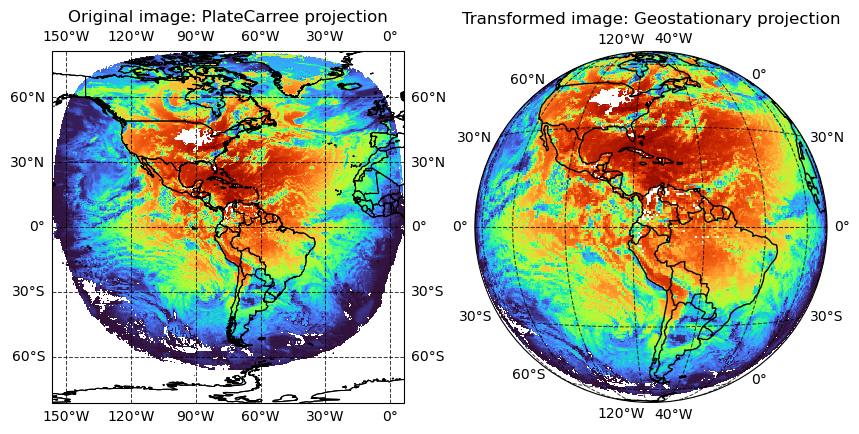

In [10]:
product_cmap = colormaps[selected_product]
def plotBothProjections(L2Data):
    import matplotlib.pyplot as plt
    import cartopy.feature as cfeature
    extent_deg = np.copy(imgExtention)
    if(coords == "xy"):
        fig = plt.figure(figsize=(10, 8))
        ax1 = fig.add_subplot(1, 2, 1, projection=map_proj_src[0])
        extent_deg = ax1.get_extent()
        im1 = ax1.imshow(L2Data[varname].values, transform=map_proj_src[0], extent=extent_deg, origin='upper', cmap=product_cmap)
        ax1.add_feature(coastlines_feature, linewidth=0.75)
        ax1.add_feature(countries_feature, linewidth=0.75)
        ax1.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.75,ls='--')
        ax1.set_title("Original image: "+map_proj_src[1],verticalalignment='bottom')

        ax2 = fig.add_subplot(1, 2, 2, projection=map_proj_dst[0])
        ax2.set_extent(imgExtention) # ax.set_global(), imgExtention, PeruLimits_deg
        extent_deg = ax2.get_extent()
        im2 = ax2.imshow(L2Data[varname].values, transform=map_proj_src[0], origin='upper', cmap=product_cmap)
        ax2.add_feature(cfeature.BORDERS)
        ax2.add_feature(cfeature.COASTLINE)
        ax2.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.75,ls='--')
        ax2.set_title("Transformed image: "+map_proj_dst[1])
        plt.show()
        plane_projection_data = im2.get_array().data
    elif(coords == "lonlat"):
        fig = plt.figure(figsize=(10, 8))

        ax1 = fig.add_subplot(1, 2, 1, projection=map_proj_src[0])
        im1 = ax1.pcolormesh(lon,lat,L2Data[varname].values,cmap=product_cmap)
        ax1.add_feature(coastlines_feature, linewidth=0.75)
        ax1.add_feature(countries_feature, linewidth=0.75)
        ax1.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.75,ls='--')
        ax1.set_title("Original image: "+map_proj_src[1])

        ax2 = fig.add_subplot(1, 2, 2, projection=map_proj_dst[0])
        im2 = ax2.pcolormesh(lon,lat,L2Data[varname].values, transform=map_proj_src[0],cmap=product_cmap)
        ax2.add_feature(cfeature.BORDERS)
        ax2.add_feature(cfeature.COASTLINE)
        ax2.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.75,ls='--')
        ax2.set_title("Transformed image: "+map_proj_dst[1])
        plt.show()
        plane_projection_data = L2Data[varname].values
    return plane_projection_data, extent_deg
transformed_data, extent_deg = plotBothProjections(data)

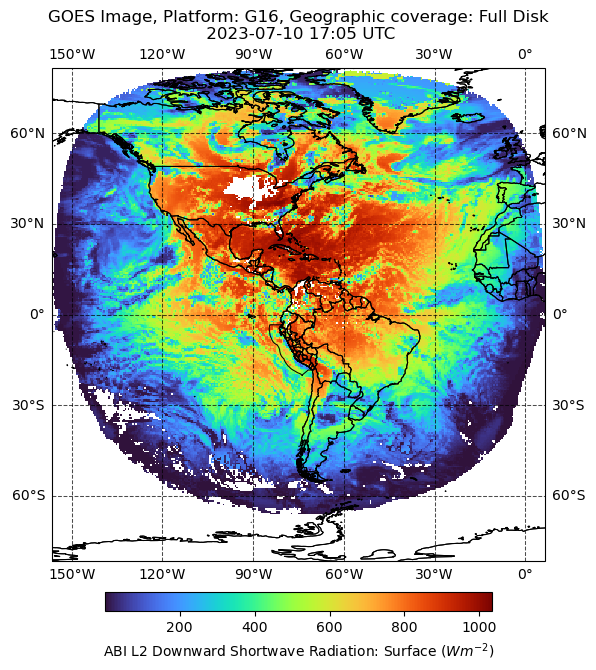

Image 'goes16_2023_07_10_DSRF_17_05.png' saved in '.\GOESimages\goes16\2023\07\10\ABI-L2-DSRF\17'


In [11]:
def plotSatImg(L2Data):
    import matplotlib.pyplot as plt
    import cartopy.feature as cfeature
    
    if(coords == "xy"):
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=map_proj_dst[0]))
        ax.set_extent(PeruLimits_deg)
        # im = ax.imshow(transformed_data, origin='lower', transform=map_proj_dst[0], extent=extent_deg, cmap='turbo')
        im = ax.imshow(L2Data[varname].values, transform=map_proj_src[0], cmap=product_cmap)
        cbar = plt.colorbar(im,ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)
        units_latex = re.sub(r'(\w)(-)(\d)', r'\1^{-\3}', L2Data[varname].units)
        if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
            cbar.set_label(r"{} $({})$, band={}".format(data.title,units_latex,selected_channel))
        else:
            cbar.set_label(r"{} $({})$".format(data.title,units_latex))
        ax.add_feature(coastlines_feature, linewidth=0.75)
        ax.add_feature(countries_feature, linewidth=0.75)
        ax.add_geometries(gdf_peru_land['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
        ax.add_geometries(gdf_peru_sea['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
        ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')
        ax.set_title("GOES Image, Platform: {}, Geographic coverage: {}\n {}".format(data.platform_ID,data.scene_id,str_ImgTime))
        plt.show()
    elif(coords == "lonlat"):
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=map_proj_src[0]))
        im = ax.pcolormesh(lon,lat,L2Data[varname].values,cmap=product_cmap,transform=map_proj_src[0])
        cbar = plt.colorbar(im,ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)
        units_latex = re.sub(r'(\w)(-)(\d)', r'\1^{-\3}', L2Data[varname].units)
        if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
            cbar.set_label(r"{} $({})$, band={}".format(data.title,units_latex,selected_channel))
        else:
            cbar.set_label(r"{} $({})$".format(data.title,units_latex))
        ax.add_feature(coastlines_feature, linewidth=0.75)
        ax.add_feature(countries_feature, linewidth=0.75)
        ax.add_geometries(gdf_peru_land['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
        ax.add_geometries(gdf_peru_sea['geometry'], crs=map_proj_pc[0], facecolor='none', edgecolor='black', linewidth=0.75)
        ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')
        ax.set_title("GOES Image, Platform: {}, Geographic coverage: {}\n {}".format(data.platform_ID,data.scene_id,str_ImgTime))
        plt.show()
    ImageName = satellite +'_'+ year +'_'+ month +'_'+ day +'_'+ selected_product.split('-')[-1] +'_'+ hour +'_'+ minute + '.png'
    # plt.savefig(os.path.join(FilePath, ImageName),dpi=300,bbox_inches='tight')
    print("Image '{}' saved in '{}'".format(ImageName,FilePath))
    return

plotSatImg(data)